<a href="https://colab.research.google.com/github/Bpatnaik470/Bpatnaik470/blob/main/P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze customer data by loading and verifying key variables, cleaning categorical features, imputing missing income values, and engineering new features for customer demographics, spending, and purchases. Conduct exploratory data analysis to identify and treat outliers. Encode categorical variables and generate a correlation heatmap. Test hypotheses related to age and shopping preferences, children and online shopping, cannibalization of in-store sales, and US versus rest-of-world purchases. Visualize product performance, age versus campaign acceptance, country with highest campaign acceptance, children at home versus total expenditure, and educational background of complainers. Finally, summarize all findings to provide insights into customer behavior, product performance, and campaign effectiveness.

# Task
Analyze customer data by loading and verifying key variables, cleaning categorical features, imputing missing income values, and engineering new features for customer demographics, spending, and purchases. Conduct exploratory data analysis to identify and treat outliers. Encode categorical variables and generate a correlation heatmap. Test hypotheses related to age and shopping preferences, children and online shopping, cannibalization of in-store sales, and US versus rest-of-world purchases. Visualize product performance, age versus campaign acceptance, country with highest campaign acceptance, children at home versus total expenditure, and educational background of complainers. Finally, summarize all findings to provide insights into customer behavior, product performance, and campaign effectiveness.

## Load and Verify Data

### Subtask:
Load the customer dataset and verify the accurate importation of key variables like 'Dt_Customer' (customer enrollment date) and 'Income', checking their data types and initial distributions.


**Reasoning**:
First, I'll import the pandas library, which is essential for data manipulation in Python, and then load the 'customer_data.csv' file into a DataFrame, displaying the first few rows to confirm successful loading and get an initial glance at the data's structure.



In [25]:
import pandas as pd

df = pd.read_csv('marketing_data.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1         

In [2]:
import pandas as pd

df = pd.read_csv('customer_data.csv')
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info (data types and non-null counts):")
df.info()

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

FileNotFoundError: [Errno 2] No such file or directory: 'customer_data.csv'

In [3]:
import pandas as pd

df = pd.read_csv('customer_data.csv')
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info (data types and non-null counts):")
df.info()

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

FileNotFoundError: [Errno 2] No such file or directory: 'customer_data.csv'

In [4]:
import pandas as pd

df = pd.read_csv('marketing_data.csv')
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info (data types and non-null counts):")
df.info()

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

First 5 rows of the DataFrame:
      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1         

In [5]:
df.columns = df.columns.str.strip() # Remove leading/trailing spaces from column names

# Clean and convert 'Income' to numeric
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert 'Dt_Customer' to datetime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

print("\nDataFrame Info after type conversions:")
df.info()

print("\nDescriptive Statistics for 'Income' after conversion:")
print(df['Income'].describe())

print("\nFirst 5 rows with updated 'Dt_Customer' and 'Income' types:")
print(df[['Dt_Customer', 'Income']].head())


DataFrame Info after type conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64        

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1973985431.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [6]:
df.columns = df.columns.str.strip() # Remove leading/trailing spaces from column names

# Clean and convert 'Income' to numeric
df['Income'] = df['Income'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Convert 'Dt_Customer' to datetime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

print("\nDataFrame Info after type conversions:")
df.info()

print("\nDescriptive Statistics for 'Income' after conversion:")
print(df['Income'].describe())

print("\nFirst 5 rows with updated 'Dt_Customer' and 'Income' types:")
print(df[['Dt_Customer', 'Income']].head())


DataFrame Info after type conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64        

In [7]:
print("Unique values in 'Education' column before cleaning:")
print(df['Education'].unique())

print("\nUnique values in 'Marital_Status' column before cleaning:")
print(df['Marital_Status'].unique())

Unique values in 'Education' column before cleaning:
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Unique values in 'Marital_Status' column before cleaning:
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [8]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Graduate', 'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', 'Basic': 'Undergraduate'})

df['Marital_Status'] = df['Marital_Status'].replace({'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})

print("Unique values in 'Education' column after cleaning:")
print(df['Education'].unique())

print("\nUnique values in 'Marital_Status' column after cleaning:")
print(df['Marital_Status'].unique())

Unique values in 'Education' column after cleaning:
['Graduate' 'Postgraduate' 'Undergraduate']

Unique values in 'Marital_Status' column after cleaning:
['Single' 'Married' 'Together']


In [9]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

print("Number of missing values in 'Income' after imputation:")
print(df['Income'].isnull().sum())


Number of missing values in 'Income' after imputation:
0


In [10]:
df['Age'] = 2014 - df['Year_Birth']
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

print("First 5 rows with new 'Age' and 'Total_Children' features:")
print(df[['Year_Birth', 'Kidhome', 'Teenhome', 'Age', 'Total_Children']].head())

First 5 rows with new 'Age' and 'Total_Children' features:
   Year_Birth  Kidhome  Teenhome  Age  Total_Children
0        1970        0         0   44               0
1        1961        0         0   53               0
2        1958        0         1   56               1
3        1967        1         1   47               2
4        1989        1         0   25               1


In [11]:
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

print("First 5 rows with new 'Total_Spending' and 'Total_Purchases' features:")
print(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending',
          'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']].head())

First 5 rows with new 'Total_Spending' and 'Total_Purchases' features:
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       189        104              379              111               189   
1       464          5               64                7                 0   
2       134         11               59               15                 2   
3        10          0                1                0                 0   
4         6         16               24               11                 0   

   MntGoldProds  Total_Spending  NumDealsPurchases  NumWebPurchases  \
0           218            1190                  1                4   
1            37             577                  1                7   
2            30             251                  1                3   
3             0              11                  1                1   
4            34              91                  2                3   

   NumCatalogPurchases  NumStoreP

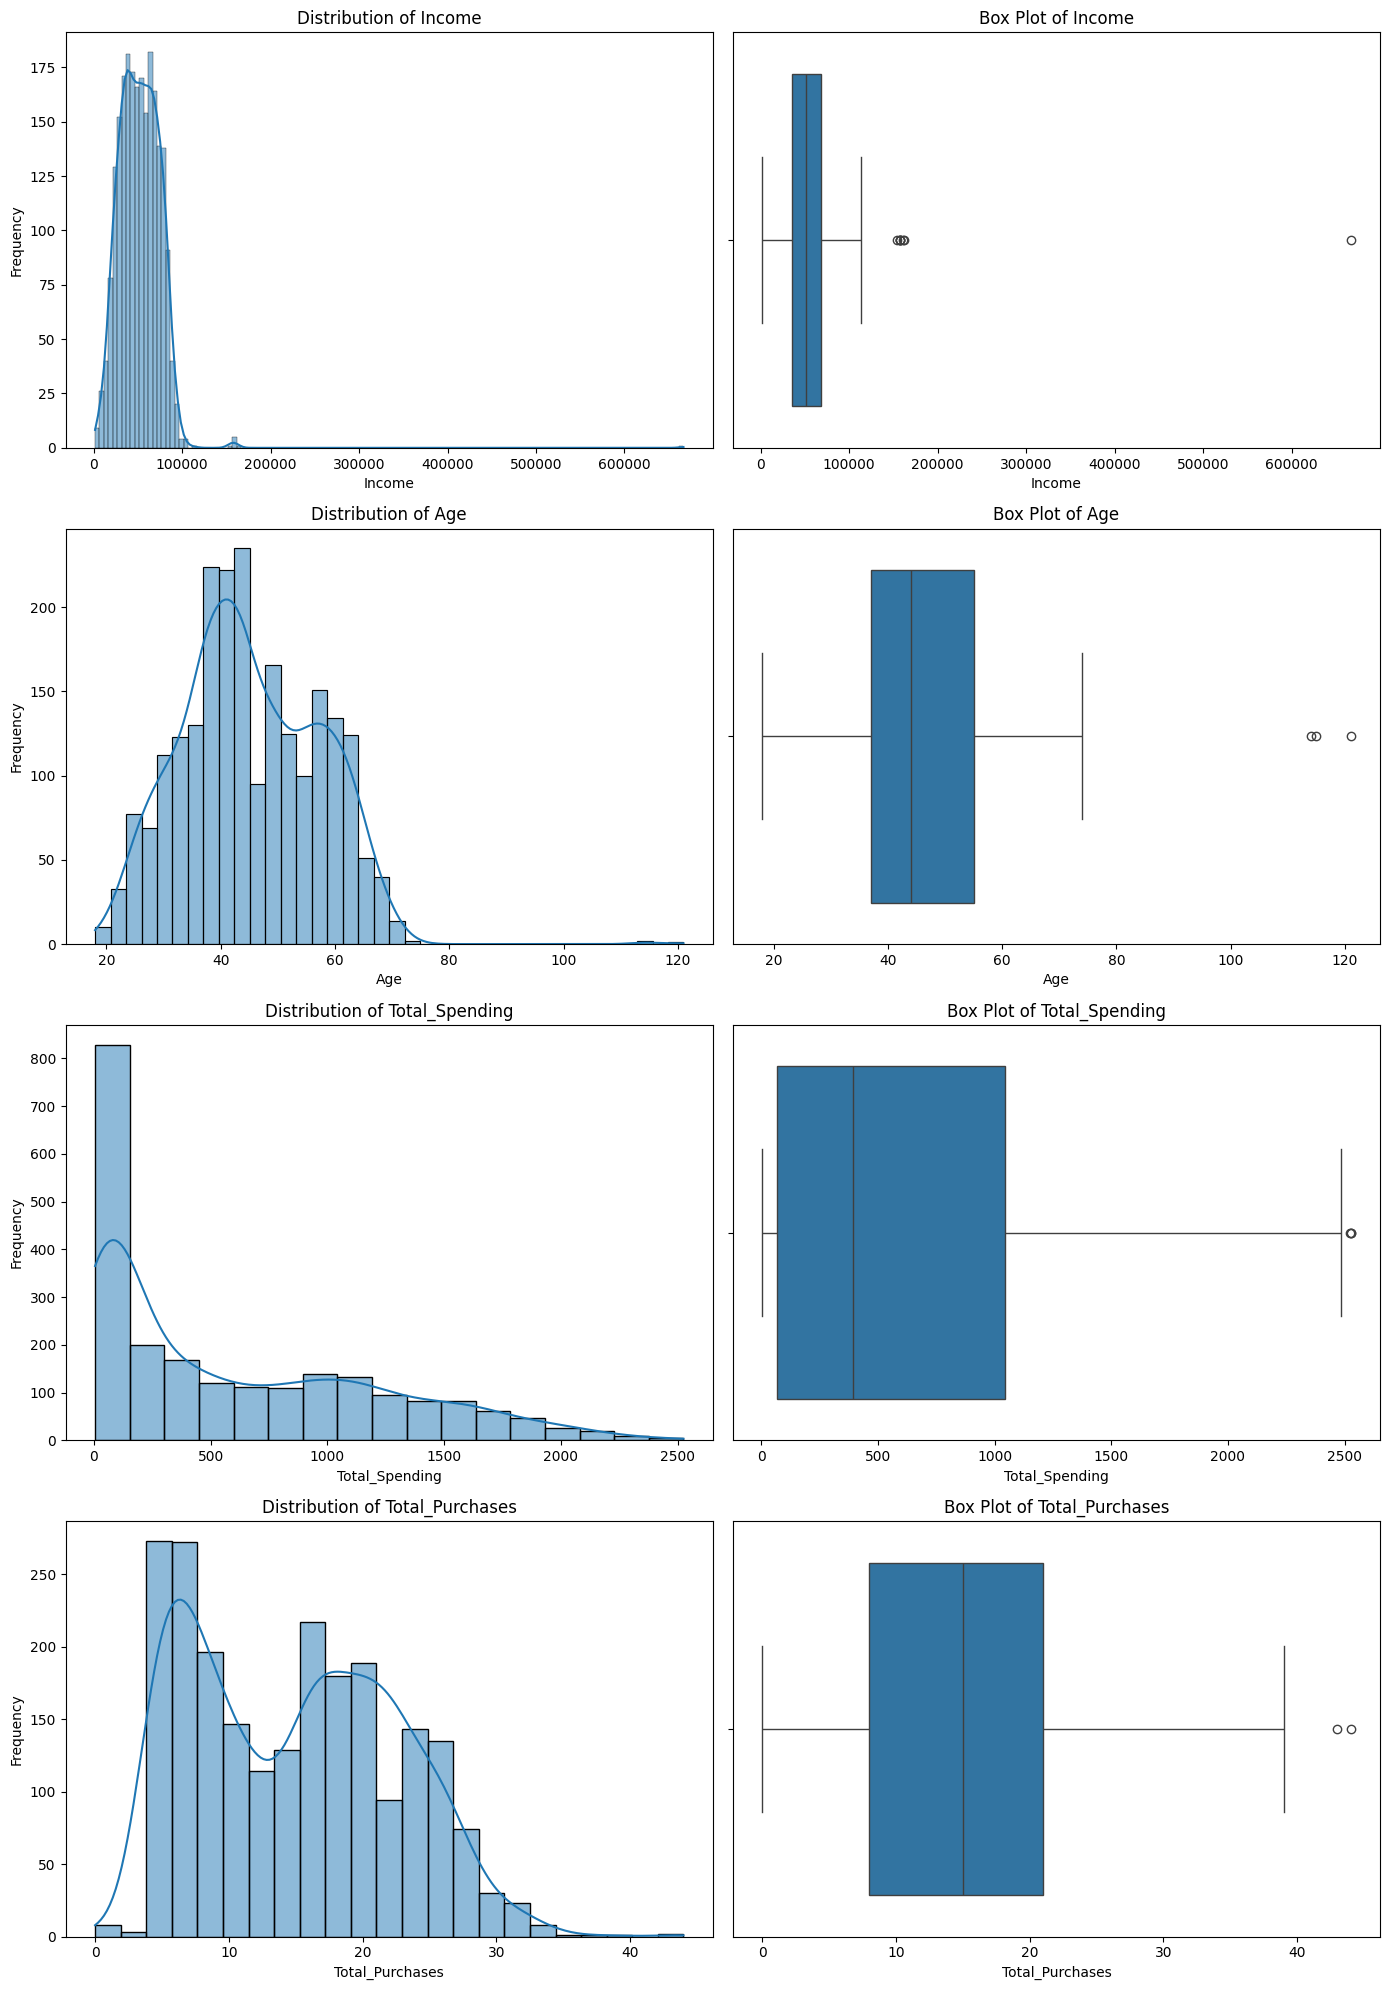

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical variables for EDA
numerical_vars = ['Income', 'Age', 'Total_Spending', 'Total_Purchases']

# Create subplots for histograms and box plots
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(14, 5 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df[var], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()

Outliers treated for: Income, Age, Total_Spending, Total_Purchases


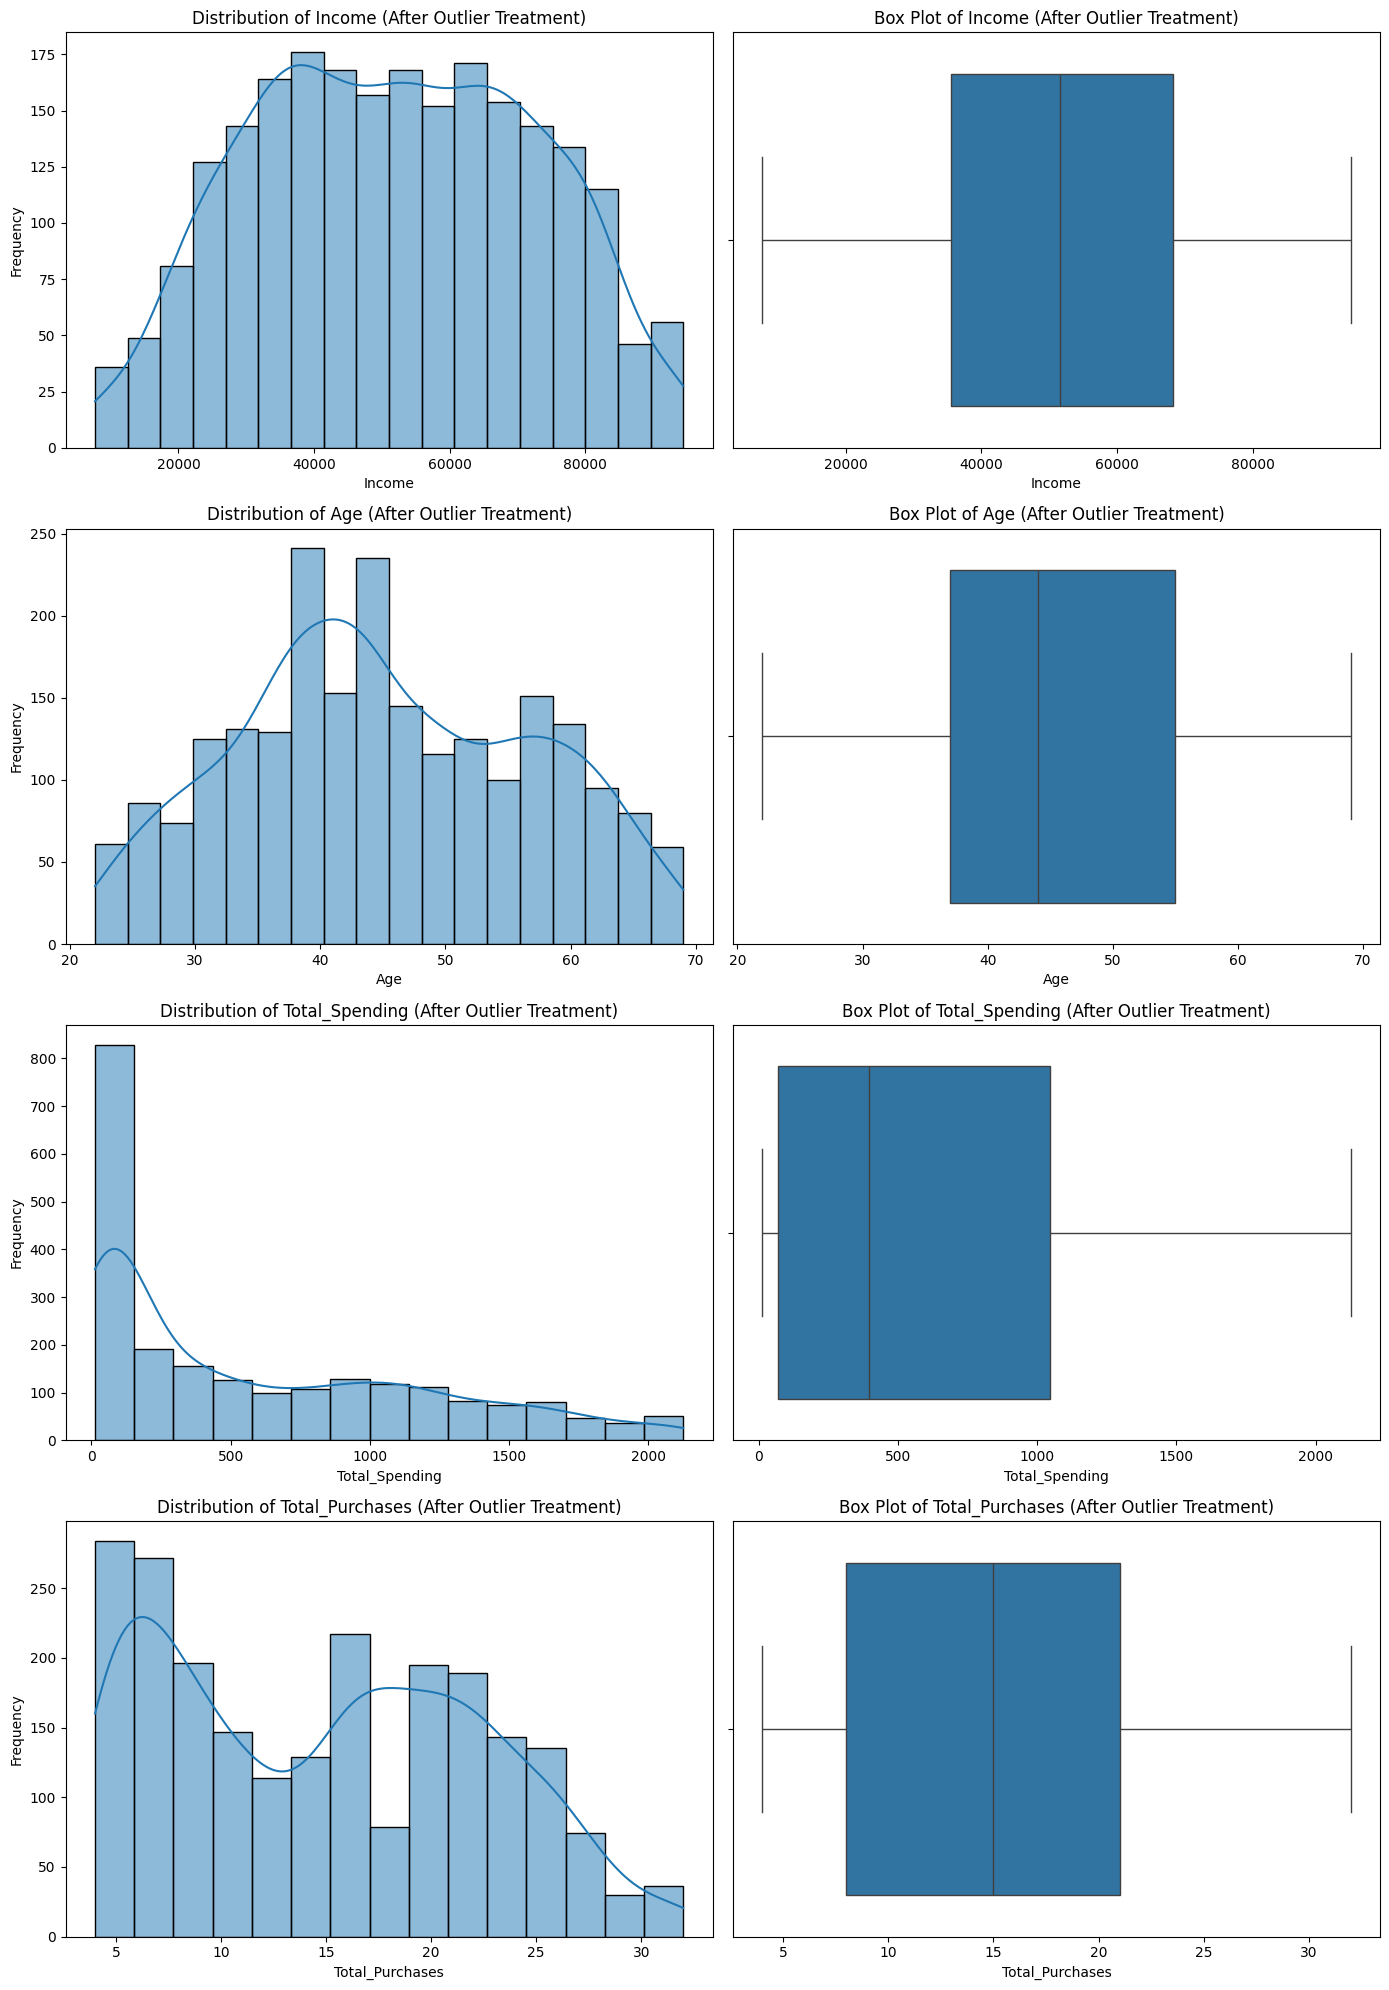

In [13]:
for var in numerical_vars:
    lower_bound = df[var].quantile(0.01)
    upper_bound = df[var].quantile(0.99)
    df[var] = df[var].clip(lower=lower_bound, upper=upper_bound)

print("Outliers treated for: Income, Age, Total_Spending, Total_Purchases")

# Regenerate plots after outlier treatment
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(14, 5 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df[var], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {var} (After Outlier Treatment)')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(x=df[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var} (After Outlier Treatment)')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for 'Education'
education_order = ['Undergraduate', 'Graduate', 'Postgraduate']

# Instantiate OrdinalEncoder
encoder = OrdinalEncoder(categories=[education_order])

# Apply ordinal encoding to 'Education'
df['Education_Encoded'] = encoder.fit_transform(df[['Education']])

# Apply one-hot encoding to 'Marital_Status' and 'Country'
df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True, dtype=int)

# Drop the original 'Education' column
df = df.drop('Education', axis=1)

print("First 5 rows of the DataFrame with encoded columns:")
print(df.head())

print("\nDataFrame Info after encoding:")
df.info()

First 5 rows of the DataFrame with encoded columns:
      ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0   1826        1970  84835.0        0         0  2014-06-16        0   
1      1        1961  57091.0        0         0  2014-06-15        0   
2  10476        1958  67267.0        0         1  2014-05-13        0   
3   1386        1967  32474.0        1         1  2014-05-11        0   
4   5371        1989  21474.0        1         0  2014-04-08        0   

   MntWines  MntFruits  MntMeatProducts  ...  Education_Encoded  \
0       189        104              379  ...                1.0   
1       464          5               64  ...                1.0   
2       134         11               59  ...                1.0   
3        10          0                1  ...                1.0   
4         6         16               24  ...                1.0   

   Marital_Status_Single  Marital_Status_Together  Country_CA  Country_GER  \
0                      1    

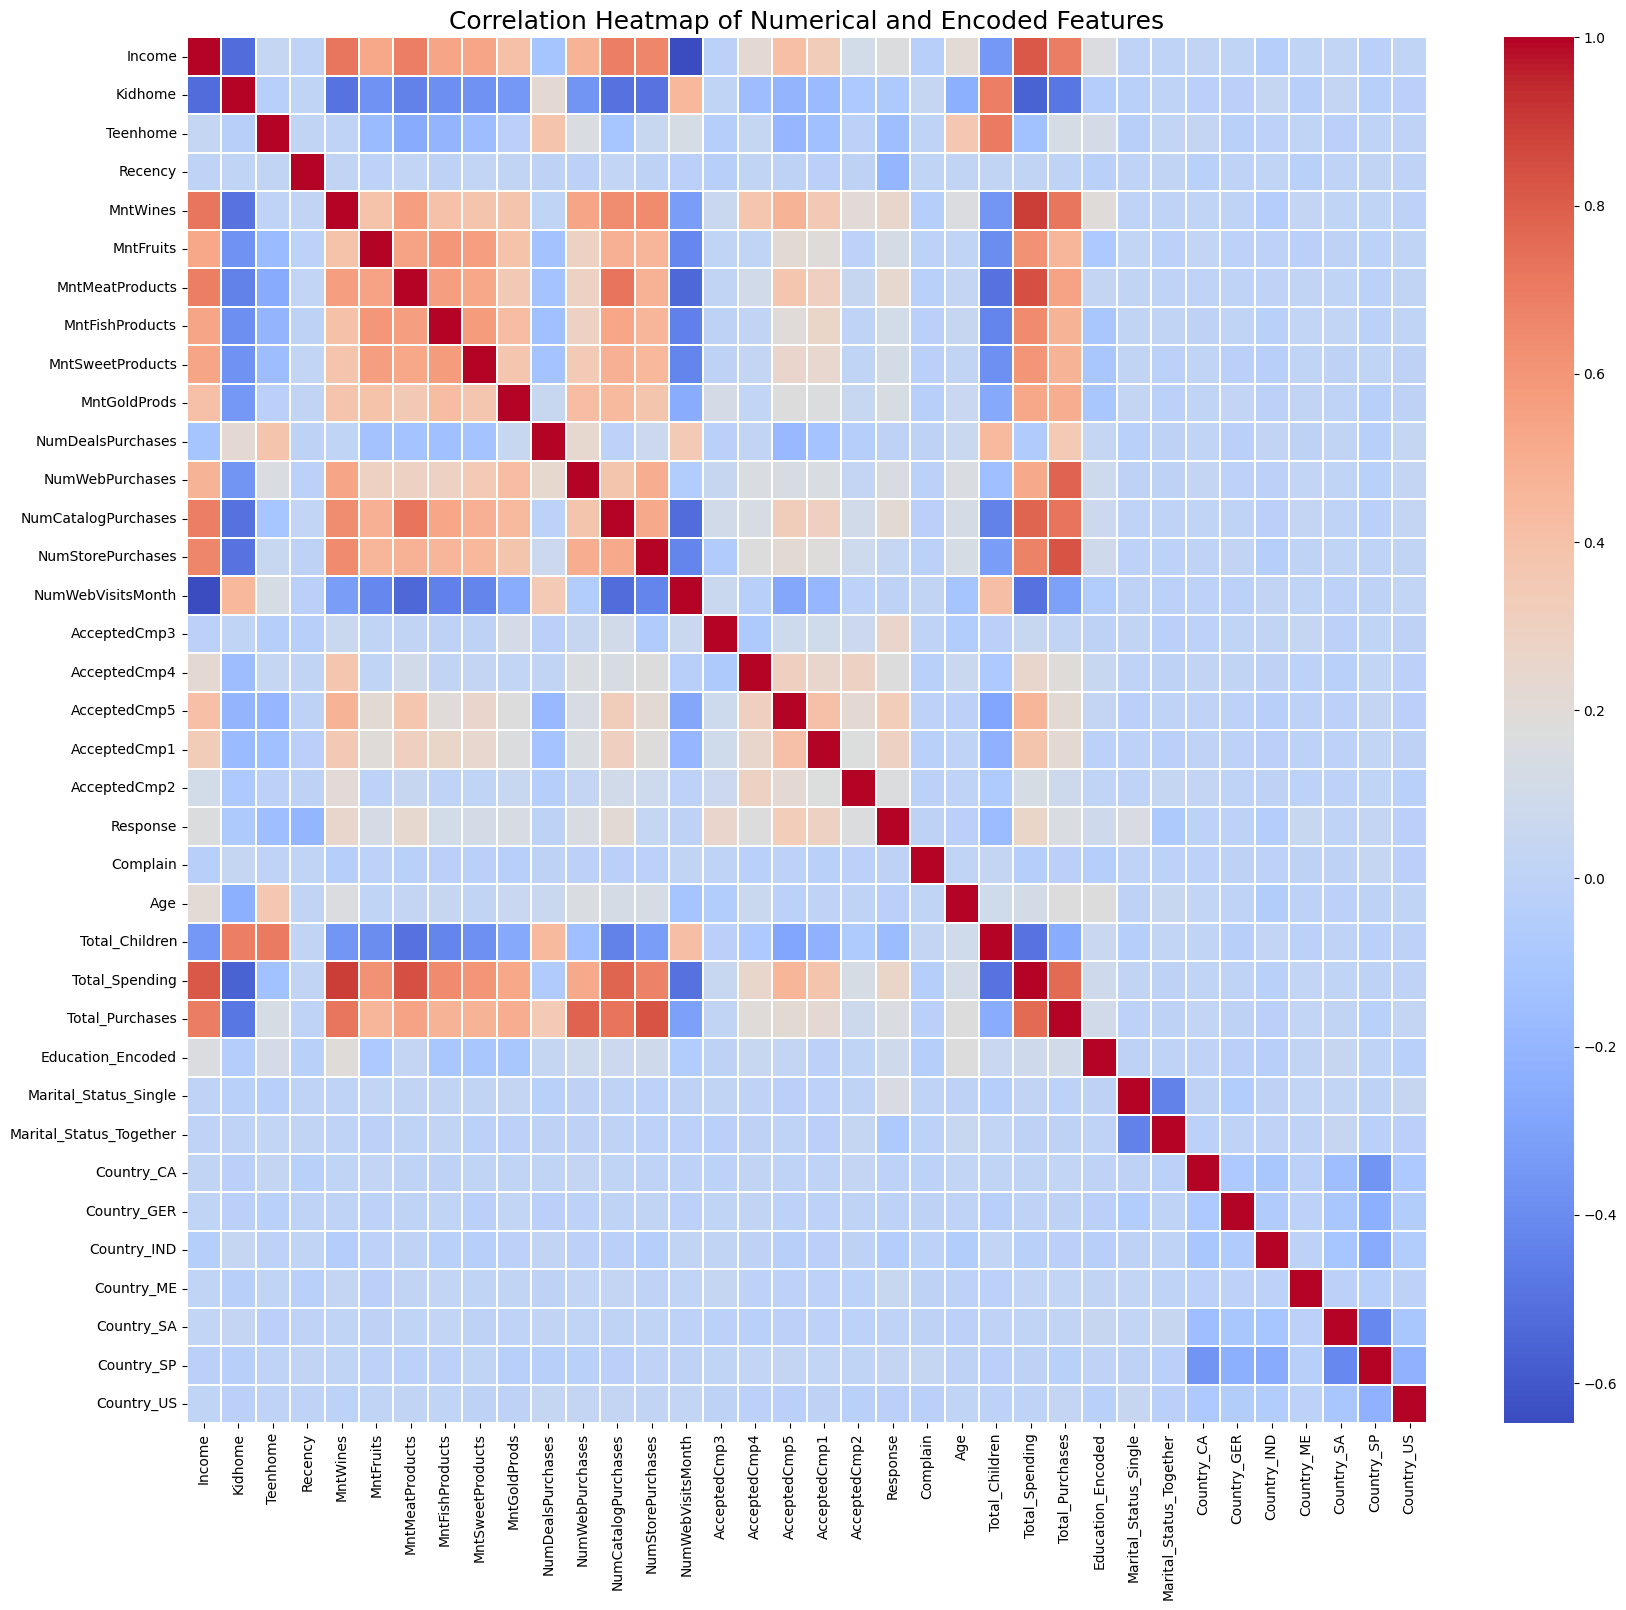

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis, excluding 'ID', 'Dt_Customer' and 'Year_Birth'
correlation_df = df.select_dtypes(include=['number']).drop(columns=['ID', 'Year_Birth'], errors='ignore')

# Calculate the correlation matrix
corr_matrix = correlation_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Draw the heatmap with a mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Heatmap of Numerical and Encoded Features', fontsize=18)
plt.show()

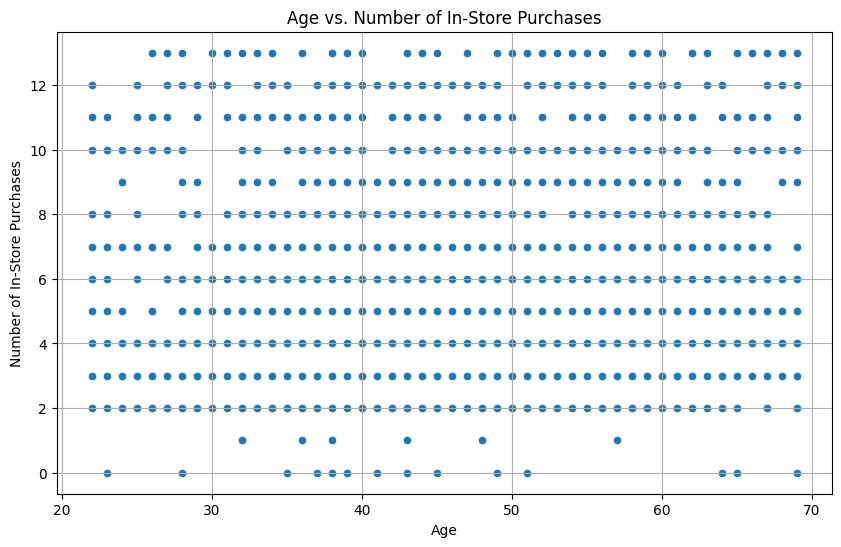

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between 'Age' and 'NumStorePurchases'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['NumStorePurchases'])
plt.title('Age vs. Number of In-Store Purchases')
plt.xlabel('Age')
plt.ylabel('Number of In-Store Purchases')
plt.grid(True)
plt.show()

In [18]:
correlation = df['Age'].corr(df['NumStorePurchases'])

print(f"Pearson correlation coefficient between Age and Number of In-Store Purchases: {correlation:.2f}")

if correlation > 0.1:
    conclusion = "There appears to be a weak positive correlation, suggesting that older individuals might slightly lean towards more in-store purchases, but the relationship is not strong."
elif correlation < -0.1:
    conclusion = "There appears to be a weak negative correlation, suggesting that older individuals might lean towards fewer in-store purchases, but the relationship is not strong."
else:
    conclusion = "There appears to be a very weak or no linear correlation between Age and Number of In-Store Purchases."

print(f"\nPreliminary Conclusion: {conclusion}")

Pearson correlation coefficient between Age and Number of In-Store Purchases: 0.14

Preliminary Conclusion: There appears to be a weak positive correlation, suggesting that older individuals might slightly lean towards more in-store purchases, but the relationship is not strong.


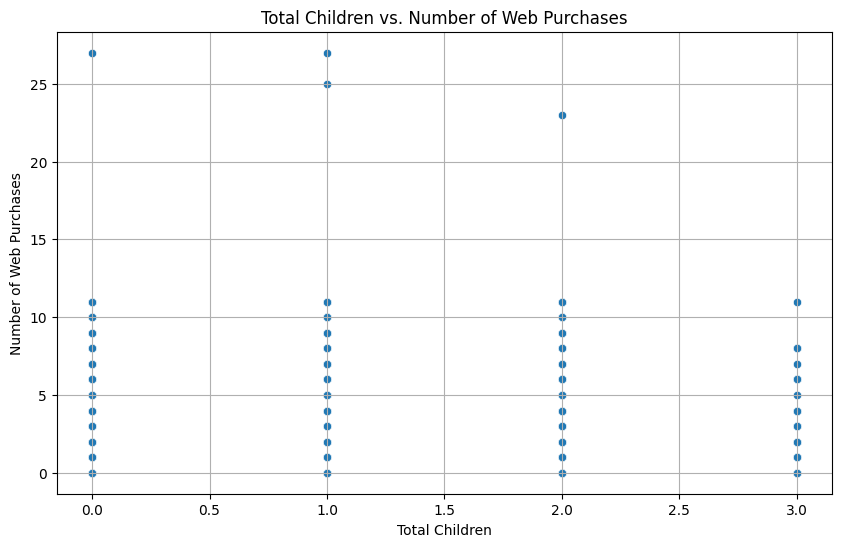

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between 'Total_Children' and 'NumWebPurchases'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total_Children'], y=df['NumWebPurchases'])
plt.title('Total Children vs. Number of Web Purchases')
plt.xlabel('Total Children')
plt.ylabel('Number of Web Purchases')
plt.grid(True)
plt.show()

**Reasoning**:
Now that the scatter plot has been generated, I will calculate the Pearson correlation coefficient between 'Total_Children' and 'NumWebPurchases' to quantify the linear relationship and then display this coefficient with a preliminary conclusion, as instructed.



In [20]:
correlation = df['Total_Children'].corr(df['NumWebPurchases'])

print(f"Pearson correlation coefficient between Total Children and Number of Web Purchases: {correlation:.2f}")

if correlation > 0.1:
    conclusion = "There appears to be a weak positive correlation, suggesting that customers with more children might slightly prefer more web purchases, but the relationship is not strong."
elif correlation < -0.1:
    conclusion = "There appears to be a weak negative correlation, suggesting that customers with more children might slightly prefer fewer web purchases, but the relationship is not strong."
else:
    conclusion = "There appears to be a very weak or no linear correlation between Total Children and Number of Web Purchases."

print(f"\nPreliminary Conclusion: {conclusion}")

Pearson correlation coefficient between Total Children and Number of Web Purchases: -0.15

Preliminary Conclusion: There appears to be a weak negative correlation, suggesting that customers with more children might slightly prefer fewer web purchases, but the relationship is not strong.


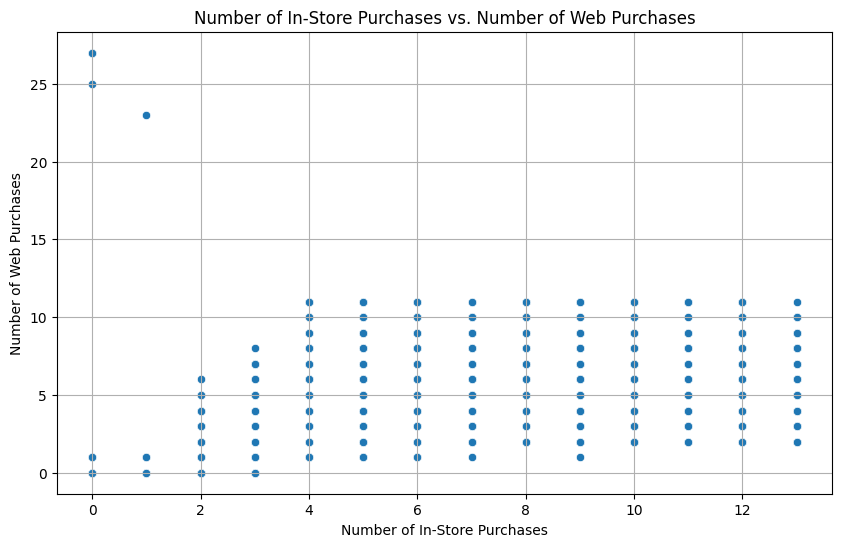

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between 'NumStorePurchases' and 'NumWebPurchases'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['NumStorePurchases'], y=df['NumWebPurchases'])
plt.title('Number of In-Store Purchases vs. Number of Web Purchases')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Number of Web Purchases')
plt.grid(True)
plt.show()

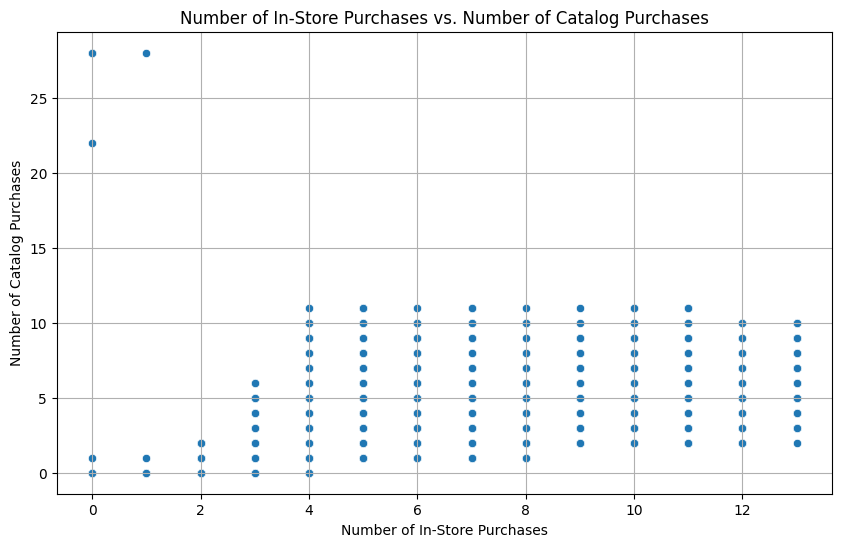

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between 'NumStorePurchases' and 'NumCatalogPurchases'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['NumStorePurchases'], y=df['NumCatalogPurchases'])
plt.title('Number of In-Store Purchases vs. Number of Catalog Purchases')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Number of Catalog Purchases')
plt.grid(True)
plt.show()

In [23]:
correlation_store_web = df['NumStorePurchases'].corr(df['NumWebPurchases'])
print(f"Pearson correlation coefficient between NumStorePurchases and NumWebPurchases: {correlation_store_web:.2f}")

Pearson correlation coefficient between NumStorePurchases and NumWebPurchases: 0.50


In [24]:
correlation_store_catalog = df['NumStorePurchases'].corr(df['NumCatalogPurchases'])
print(f"Pearson correlation coefficient between NumStorePurchases and NumCatalogPurchases: {correlation_store_catalog:.2f}")

Pearson correlation coefficient between NumStorePurchases and NumCatalogPurchases: 0.52
